# Laboratoire 1

Laboratoire 1 du cours MTH 8408. Présenté à Tangi Migot

Jean-Luc Lupien

1896017

In [100]:
using Pkg
Pkg.activate("JuMP")
Pkg.activate("Ipopt")
Pkg.activate("MathOptInterface")



  Activating project at `f:\New folder\Git\MTH8408\lab1\JuMP`
  Activating new project at `f:\New folder\Git\MTH8408\lab1\Ipopt`
  Activating project at `f:\New folder\Git\MTH8408\lab1\MathOptInterface`


In [101]:
using Ipopt
using MathOptInterface
using JuMP


## Exercice 1

Il faut modéliser le problème $\min\limits _{x\in \mathbb{R}}(x_1-2)^2+(x_2-1)^2$ Sous les contraintes : $x_1^2-x_2 \le 0, x_1+x_2\le 2$.

La solution minimale sans contraintes est de $f(x^*)=0$ lorsque $x_1=2,x_2=1$. Cependant, la solution minimale sous les contraintes est de $x_1=x_2=1$. Voyons si IPOPT donne la bonne solution.

In [102]:
# Initialisation du modèle et des contraintes.
Model1 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model1, x1)
@variable(Model1, x2)

@constraint(Model1, x1*x1 - x2 <= 0)
@constraint(Model1, x1+x2 <=2)

@NLobjective(Model1, Min, (x1-2)^2 + (x2-1)^2)

### Partie 1
La sortie d'IPOPT est présentée ci-dessous. La sortie indique que la solution optimale a été trouvée.

In [115]:
JuMP.optimize!(Model1)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.0000000e+00 0.00e+00 1.60e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Partie 2
On observe que la solution obtenue par IPOPT est bien $x_1=x_2=1$ avec une imprécision numérique. 

### Partie 3
Le statut final d'IPOPT est que la solution optimale a été trouvée.

In [104]:
# Affichage de la solution

@show JuMP.has_values(Model1)
@show JuMP.value(x1)
@show JuMP.value(x2)
@show JuMP.termination_status(Model1)
;

JuMP.has_values(Model1) = true
JuMP.value(x1) = 1.0000000074654387
JuMP.value(x2) = 1.0000000086836092
JuMP.termination_status(Model1) = MathOptInterface.LOCALLY_SOLVED


## Exercice 2

Il faut ici modéliser $\min\limits_{x\in \mathbb{R}} x$ sous la contrainte $x^2=0$. 

On voit rapidement que la seule solution est que $x^*=0$. Tentons la résolution en mettant la valeur initiale $x_0=1$.


In [105]:
#Initialization du modèle et les contraintes

Model2 = Model(with_optimizer(Ipopt.Optimizer))
@variable(Model2, x, start = 1)

@NLconstraint(Model2, x^2 == 0)
@NLobjective(Model2, Min, x)



### Question 1
Voici la sortie d'IPOPT ci-dessous. 

In [106]:
# Optimisation du modèle
JuMP.optimize!(Model2)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 1.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Question 2
Le status final d'IPOPT est que la solution Optimale a été trouvée.

In [107]:
# Affichage de la solution
@show JuMP.value(x)
d = NLPEvaluator(Model2)
MathOptInterface.initialize(d, [:Grad])
∇f = zeros(1)
MathOptInterface.eval_objective_gradient(d, ∇f, zeros(1))
∇f


JuMP.value(x) = 6.103515625e-5


1-element Vector{Float64}:
 1.0

### Question 3
On observe que la valeur obtenue, $6.104 \times 10^{-5}$ est proche de la solution optimale qui est à $x=0$. Le résidu d'optimalité dans ce cas est de 1. 

## Exercice 3
On étudie la fonction : $f(x_1,x_2) = 100(x_2-x_1^2)^2+(1-x_1)^2$. Nous voulons d'abord tracer les courbes de niveau de cette fonction. Le graphe est inclu ci-dessous. 

In [108]:
using Plots

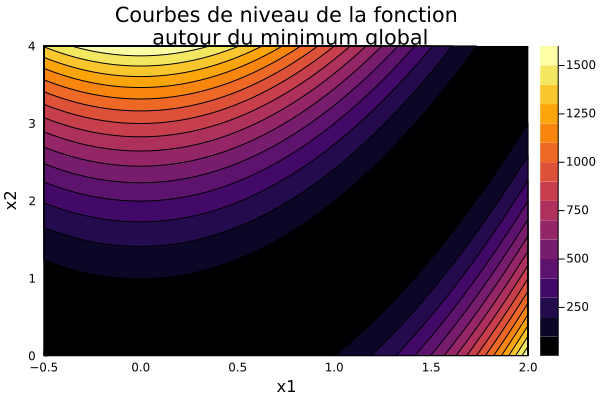

In [109]:
x = range(-0.5, 2, length = 1000)
y = range(0, 4, length =1000)

f(x, y) = 100*(y-x^2)^2 + (1-x)^2

p = plot(x, y, f, st= [:contourf],
 title = "Courbes de niveau de la fonction\n autour du minimum global",
 xlabel = "x1",
 ylabel = "x2")
plot!(p)

### Question 1
Il faut déterminer le minimum de la fonction $f(x_1,x_2)$. Or, nous savons que la fonction est positive puisque c'est la somme de deux termes au carré. La fonction est donc bornée de telle manière à ce que $f(x_1,x_2) \ge 0$. Ainsi, si un point $(x_1^*,x_2^*)$ peut être trouvé de telle manière que $f(x_1^*,x_2^*)=0$, ce point sera un minimum global de la fonction. Or, il y a un tel point. Le point $x_1^*=x_2^*=1$ est tel que $f(x_1^*,x_2^*)=0$ et donc un minimum global de la fonction.

### Question 2
Dans le code qui suit, on essaie de retrouver ce minimum avec JuMP.


In [110]:
# Modélisation du problème avec JuMP

Model3 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model3, x1)
@variable(Model3, x2)

@NLobjective(Model3, Min, 100*(x2-x1^2)^2+(1-x1)^2)

JuMP.optimize!(Model3)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 0.00e+00 2.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

On observe que la solution minimale voulue est bien obtenue. On obtient la valeur optimale lorsque $x_1=x_2=1$.

### Question 3
Si on rajoute la contrainte d'égalité : $x_1^2 -x_2 =10$, la solution sera changée puisque le point (1,1) ne fait plus partie de l'ensemble admis. Il est possible de trouver la nouvelle solution optimale avec JuMP qui est $x_1=1,x_2=-9$.

In [111]:
# Modélisation du problème avec JuMP

Model3 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model3, x1)
@variable(Model3, x2)

@NLconstraint(Model3, x1^2-x2 == 10)

@NLobjective(Model3, Min, 100*(x2-x1^2)^2+(1-x1)^2)

JuMP.optimize!(Model3)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 1.00e+01 2.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Question 4
Une contrainte d'égalité qui ne change pas la solution doit contenir le point optimal $x_1=x_2=1$. Un exemple d'une telle contrainte est, par exemple, $x_1+x_2 = 2$. On peut résoudre le nouveau système avec JuMP et voir que la solution optimale est conservée.

In [112]:
# Modélisation du problème avec JuMP

Model3 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model3, x1)
@variable(Model3, x2)

@constraint(Model3, x1+x2 == 2)

@NLobjective(Model3, Min, 100*(x2-x1^2)^2+(1-x1)^2)

JuMP.optimize!(Model3)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 2.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Question 5
Une contrainte d'inégalité qui change la solution est $x_1*x_2 -3x_1 \ge 0$. La solution n'est pas dans l'ensemble puisque $1\times 1-3\times 1 = -2 \lt 0$.

JuMP donne la solution optimale à ce problème comme étant : $x_1=x_2=0$

In [113]:
# Modélisation du problème avec JuMP

Model3 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model3, x1)
@variable(Model3, x2)

@NLconstraint(Model3, x1*x2-3*x1 >= 0)

@NLobjective(Model3, Min, 100*(x2-x1^2)^2+(1-x1)^2)

JuMP.optimize!(Model3)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 0.00e+00 3.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Question 6

L'inverse de la condition ci-haut pour la question 5 ne changerait évidemment pas la solution puisque le point optimal serait conservé dans la solution. Il est également possible, cependant de penser à un domaine ellipsoïde comme : $\frac{x_1^2}{9} + \frac{x_2^2}{4} \le 1$ qui ne change pas la solution. La vérification avec JuMP donne bien la solution optimale (1,1).

In [114]:
# Modélisation du problème avec JuMP

Model3 = Model(with_optimizer(Ipopt.Optimizer))

@variable(Model3, x1)
@variable(Model3, x2)

@NLconstraint(Model3, x1^2/9+x2^2/4 <= 1)

@NLobjective(Model3, Min, 100*(x2-x1^2)^2+(1-x1)^2)

JuMP.optimize!(Model3)
@show value(x1)
@show value(x2);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        5

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 0.00e+00 2.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  